In [1]:
# 현재 가상 머신을 자신의 구글 드라이브와 연결
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# geopandas 및 관련 패키지 설치
!pip install geopandas folium mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic') #한글 폰트 적용

In [4]:
import pandas as pd
import geopandas as gpd

In [8]:
# 종분포 데이터
gdf_pt = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/sea/data/geo_mbris_obis_edu_light2.gpkg', encoding="UTF-8")
gdf_pt.info()
gdf_pt.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11041 entries, 0 to 11040
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   spc_scitf_nm  11041 non-null  object  
 1   comm_kor_nm   8148 non-null   object  
 2   genus         11034 non-null  object  
 3   genus_nm      8180 non-null   object  
 4   family        11037 non-null  object  
 5   family_nm     8146 non-null   object  
 6   order_        11037 non-null  object  
 7   order_nm      8098 non-null   object  
 8   class         11041 non-null  object  
 9   class_nm      8572 non-null   object  
 10  phylum        11041 non-null  object  
 11  phylum_nm     10328 non-null  object  
 12  kingdom       11041 non-null  object  
 13  kingdom_nm    11041 non-null  object  
 14  lati_val      11041 non-null  float64 
 15  loti_val      11041 non-null  float64 
 16  col_bg_dt     11041 non-null  object  
 17  ssea_id       11041 non-null  object  
 18

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
0,Bacillus pumilus,NaN,Bacillus,NaN,Bacillaceae,NaN,Caryophanales,NaN,Bacilli,NaN,...,NaN,Bacteria,세균계,37.284444,126.556389,20090325,W,5154-4,mbris,POINT (126.55639 37.28444)
1,Aetea anguina,자루이끼벌레,Aetea,자루이끼벌레속,Aeteidae,자루이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
2,Cellaria punctata,마디이끼벌레,Cellaria,마디이끼벌레속,Cellariidae,마디이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
3,Cellaria punctata,마디이끼벌레,Cellaria,마디이끼벌레속,Cellariidae,마디이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)
4,Reteporellina denticulata,등색망이끼벌레,Reteporellina,망이끼벌레속,Phidoloporidae,연구멍이끼벌레과,Cheilostomatida,순구목,Gymnolaemata,나후강,...,태형동물문,Animalia,동물계,33.168683,126.293617,20150605,SW,232-5,mbris,POINT (126.29362 33.16868)


In [6]:
# 대한민국 육지부 
gdf_kor = gpd.read_file('/content/gdrive/My Drive/Colab Notebooks/sea/data/korea.shp', encoding="UTF-8")
gdf_kor.head()

,FID,geometry
0,0,"POLYGON ((125.09799 34.09642, 125.12315 34.087..."
1,1,"POLYGON ((125.28408 34.40385, 125.29186 34.391..."
2,2,"POLYGON ((125.29369 34.45168, 125.29432 34.439..."
3,3,"POLYGON ((125.85485 34.63038, 125.86109 34.604..."
4,4,"POLYGON ((125.46499 34.65614, 125.47765 34.649..."


In [9]:
# 종분포(포인트)에서  괭생이모자반(Sargassum horneri)을 추출 
gdf_pt2 = gdf_pt[ (gdf_pt['spc_scitf_nm']  == 'Sargassum horneri')  | (gdf_pt['comm_kor_nm']  == '괭생이모자반')   ]
gdf_pt2.info()
gdf_pt2.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 37 entries, 33 to 10881
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   spc_scitf_nm  37 non-null     object  
 1   comm_kor_nm   37 non-null     object  
 2   genus         37 non-null     object  
 3   genus_nm      37 non-null     object  
 4   family        37 non-null     object  
 5   family_nm     37 non-null     object  
 6   order_        37 non-null     object  
 7   order_nm      37 non-null     object  
 8   class         37 non-null     object  
 9   class_nm      37 non-null     object  
 10  phylum        37 non-null     object  
 11  phylum_nm     37 non-null     object  
 12  kingdom       37 non-null     object  
 13  kingdom_nm    37 non-null     object  
 14  lati_val      37 non-null     float64 
 15  loti_val      37 non-null     float64 
 16  col_bg_dt     37 non-null     object  
 17  ssea_id       37 non-null     object  
 18  

,spc_scitf_nm,comm_kor_nm,genus,genus_nm,family,family_nm,order_,order_nm,class,class_nm,...,phylum_nm,kingdom,kingdom_nm,lati_val,loti_val,col_bg_dt,ssea_id,sstrnc_no,kind,geometry
33,Sargassum horneri,괭생이모자반,Sargassum,모자반속,Sargassaceae,모자반과,Fucales,말목,Phaeophyceae,갈조강,...,대롱편모조식물문,Chromista,크로미스타계,33.123889,126.268333,20110204,SW,232-8,mbris,POINT (126.26833 33.12389)
246,Sargassum horneri,괭생이모자반,Sargassum,모자반속,Sargassaceae,모자반과,Fucales,말목,Phaeophyceae,갈조강,...,대롱편모조식물문,Chromista,크로미스타계,32.106239,125.172197,20160609,SW,250-8,mbris,POINT (125.17220 32.10624)
308,Sargassum horneri,괭생이모자반,Sargassum,모자반속,Sargassaceae,모자반과,Fucales,말목,Phaeophyceae,갈조강,...,대롱편모조식물문,Chromista,크로미스타계,33.208611,126.294722,20100128,SW,232-5,mbris,POINT (126.29472 33.20861)
444,Sargassum horneri,괭생이모자반,Sargassum,모자반속,Sargassaceae,모자반과,Fucales,말목,Phaeophyceae,갈조강,...,대롱편모조식물문,Chromista,크로미스타계,33.225142,126.565247,20150506,SW,233-4,mbris,POINT (126.56525 33.22514)
1429,Sargassum horneri,괭생이모자반,Sargassum,모자반속,Sargassaceae,모자반과,Fucales,말목,Phaeophyceae,갈조강,...,대롱편모조식물문,Chromista,크로미스타계,33.424156,126.931231,20150505,SW,233-3,mbris,POINT (126.93123 33.42416)


In [10]:
import seaborn as sns

<Axes: >

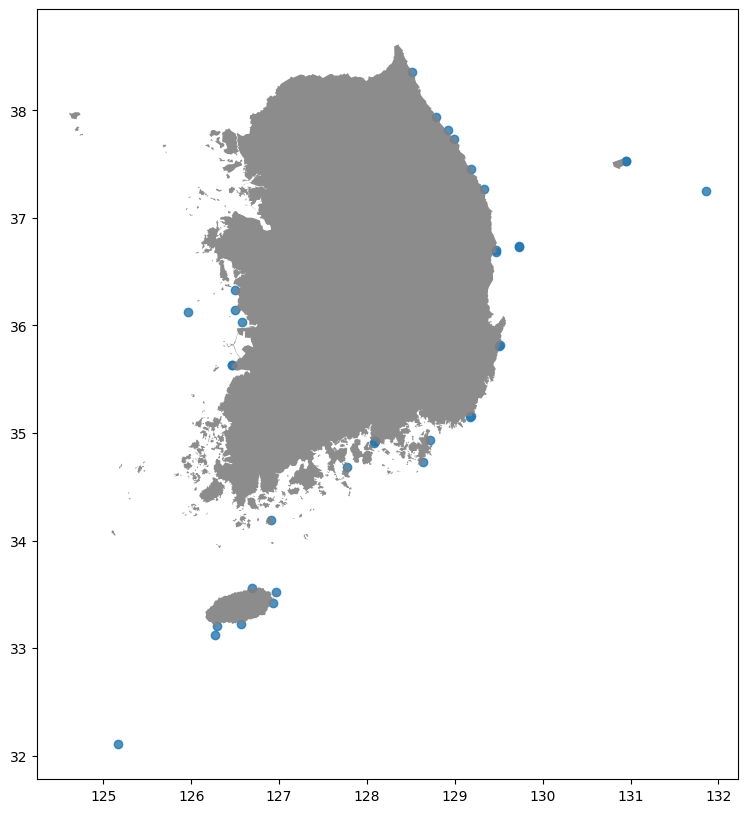

In [11]:
ax = gdf_kor.plot(color='grey', figsize=(10, 10), zorder=100, alpha=0.9)    # 차트의 순서를 지정 
gdf_pt2.plot(alpha=0.8, ax=ax)

<Axes: >

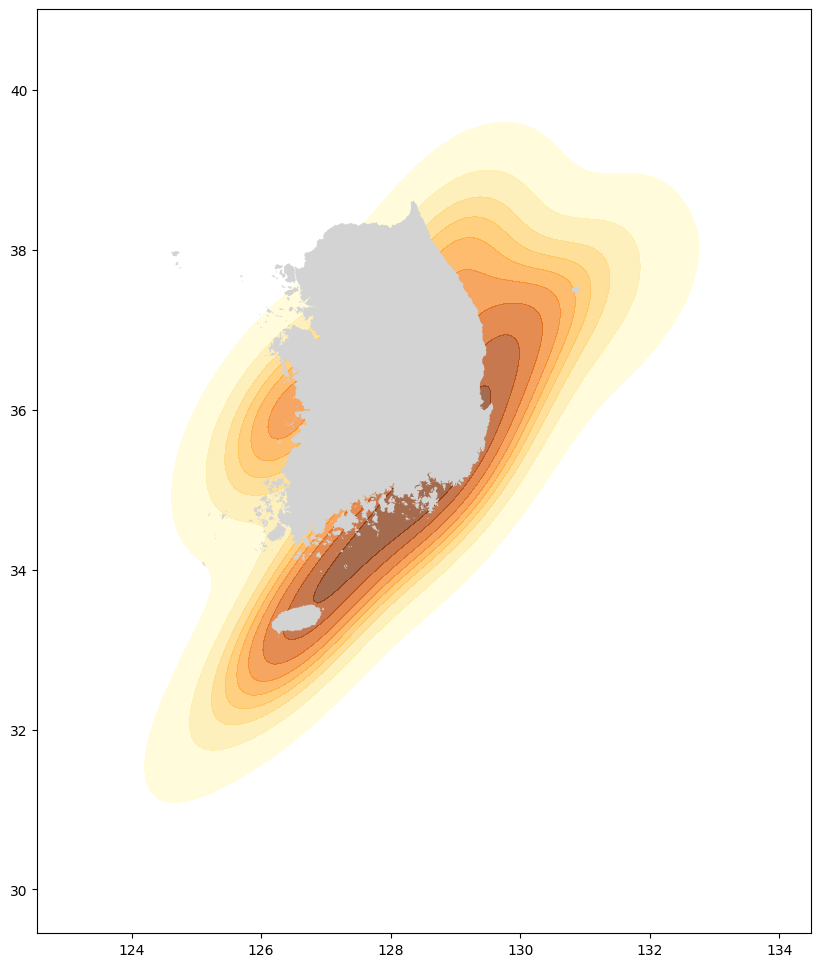

In [14]:
ax = gdf_kor.plot(color='lightgrey', figsize=(12, 12), zorder=100, alpha=1)    # 차트의 순서를 지정 
sns.kdeplot(data=gdf_pt2, x=gdf_pt2.geometry.x, y=gdf_pt2.geometry.y, fill=True, cmap="YlOrBr", alpha=0.7, ax=ax)

In [15]:
gdf_pt2.explore(marker_type='circle_marker', marker_kwds=dict(radius=4, color='red'), tiles='http://mt0.google.com/vt/lyrs=y&hl=en&x={x}&y={y}&z={z}&s=Ga', attr='google')

In [16]:
import folium
from folium.plugins import HeatMap

In [20]:
gdf_pt2['lat'] = gdf_pt2.geometry.y
gdf_pt2['lon'] = gdf_pt2.geometry.x

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [23]:
# Create a base map
map = folium.Map(location=[36, 128], tiles='cartodbdark_matter', zoom_start=7)

# Add a heatmap to the base map
HeatMap(data=gdf_pt2[['lat', 'lon']], radius=20).add_to(map)

# Display the map
map